In [34]:
import sys
sys.path.append("core")
from chips import RegisterAIA
import datetime as dt
import numpy as np
import cv2
from scipy import signal

%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
_dict_ = {}
_dict_["date"] = dt.datetime(2018,5,30,12)
_dict_["wavelength"] = 193
_dict_["resolution"] = 1024
_dict_["vmin"] = 35
aia = RegisterAIA(_dict_["date"], _dict_["wavelength"], _dict_["resolution"], vmin=_dict_["vmin"])

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

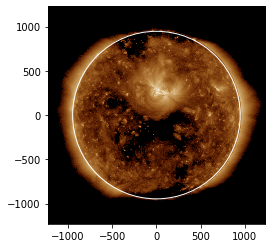

In [3]:
fig = plt.figure()
ax = fig.add_subplot(111)
#ax.hist(aia.m_normalized.data.ravel(), bins=100, histtype="step", density=True)
#ax.set_xscale("log")
aia.m_normalized.plot(annotate=False, axes=ax, vmin=_dict_["vmin"])
aia.m_normalized.draw_limb()
plt.show()

array([ 18.51411086,  58.01192245,  59.89277062,  61.1466694 ,
        62.40056819,  63.65446697, 102.52532917, 109.42177247,
       116.31821576, 119.45296271, 120.70686149, 132.61889991,
       135.75364686, 139.51534321])

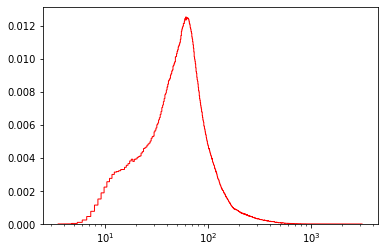

In [72]:
rsun_obs = 1.74*aia.m_normalized.rsun_obs.value
mask = np.zeros_like(aia.m_normalized.data)*np.nan
cv2.circle(mask, (2048,2048), int(rsun_obs), 255, -1)
mask[mask==255] = 1
fig = plt.figure()
ax = fig.add_subplot(111)
data = mask * aia.m_normalized.data
h, be, _ = ax.hist(data.ravel(), bins=5000, histtype="step", color="r", density=True)
ax.set_xscale("log")
bc = be[:-1] + np.diff(be)
peaks, _ = signal.find_peaks(h, height=.002)
peak_points = bc[peaks]
peak_points

Text(0.5, 0, 'arc sec')

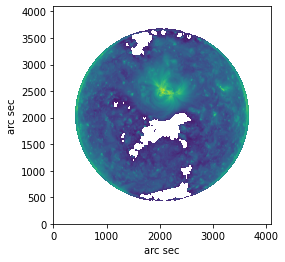

In [84]:
lim = 0 # Change this parameter (-15, 15)
peak = peak_points[0] + lim
tmp = np.copy(data)
tmp[tmp<=peak] = np.nan
fig = plt.figure()
ax = fig.add_subplot(111)
ax.imshow(np.log10(tmp), origin="lower")
ax.set_ylabel("arc sec")
ax.set_xlabel("arc sec")